# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [0]:
from scipy import stats 

from scipy.stats import zscore
from scipy.stats import ttest_ind
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [180]:
GPU1_mu , GPU1_std = np.mean(GPU1),np.std(GPU1)
GPU1_mu , GPU1_std

(10.333333333333334, 1.1352924243950933)

In [181]:
GPU2_mu , GPU2_std = np.mean(GPU2),np.std(GPU2)
GPU2_mu , GPU2_std

(11.466666666666667, 1.1469767022723503)

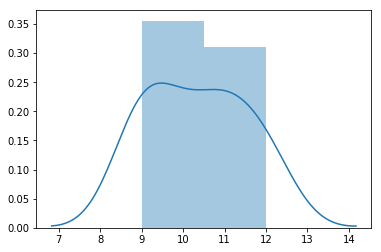

In [182]:
sns.distplot(GPU1)

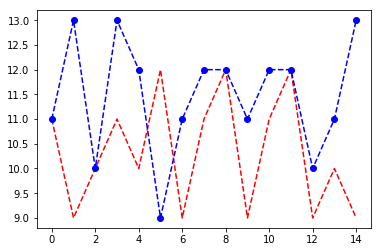

In [6]:
plt.plot(GPU1,'k--',color='r')
plt.plot(GPU2,'o--',color='b')

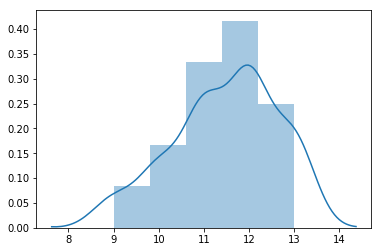

In [7]:
sns.distplot(GPU2)

In [0]:
GPU1_z = pd.DataFrame(GPU1).apply(zscore)
GPU2_z = pd.DataFrame(GPU2).apply(zscore)

In [29]:
GPU1_z_mu , GPU1_z_std =  (GPU1_z.mean(),GPU1_z.std())
GPU1_z_mu , GPU1_z_std

(0   -5.033011e-16
 dtype: float64, 0    1.035098
 dtype: float64)

In [30]:
GPU2_z_mu , GPU2_z_std =  (GPU2_z.mean(),GPU2_z.std())
GPU2_z_mu , GPU2_z_std

(0   -4.440892e-17
 dtype: float64, 0    1.035098
 dtype: float64)

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [32]:
ttest_ind(GPU1,GPU2)

Ttest_indResult(statistic=-2.627629513471839, pvalue=0.013794282041452725)

In [0]:
# Alternate Hypothesis is true as pvalue << alpha

## Question 3

He is trying a third GPU - GPU3.

In [0]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

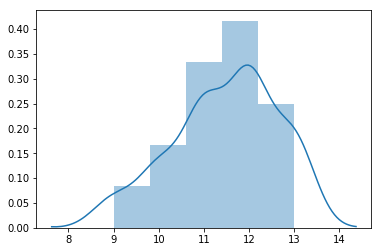

In [30]:
sns.distplot(GPU2)

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [41]:
ttest_ind(GPU1,GPU3)

Ttest_indResult(statistic=-1.4988943759093303, pvalue=0.14509210993138993)

In [0]:
# Null Hypothesis : There is no significant difference between data sets is true

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [0]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

In [0]:
# Levene test 

## H0 = there is no differnce in the variances
## H1 =  all the variances are not same.


from scipy.stats import ttest_1samp , ttest_ind, mannwhitneyu, levene , shapiro, wilcoxon
from statsmodels.stats.power import ttest_power



In [93]:
levene(e1,e2,e3)

# Null Hypothesis : There is no significant difference between data sets variances is true

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

In [0]:
import pandas as  pd

In [82]:
df1 = pd.DataFrame(e1)
df2 = pd.DataFrame(e2)
df3 = pd.DataFrame(e3)
df1

,0
0,1.59544
1,1.41973
2,0.00000
3,0.00000


In [84]:
df1['1']=df2
df1

,0,1
0,1.59544,1.433800
1,1.41973,2.079700
2,0.00000,0.892139
3,0.00000,2.384740


In [85]:
df1['2']=df3
df1

,0,1,2
0,1.59544,1.433800,0.036930
1,1.41973,2.079700,0.938018
2,0.00000,0.892139,0.995956
3,0.00000,2.384740,1.006970


In [92]:
df1 = df1.rename(columns={0:'e1','1':'e2','2':'e3'})
df1

,e1,e2,e3
0,1.59544,1.433800,0.036930
1,1.41973,2.079700,0.938018
2,0.00000,0.892139,0.995956
3,0.00000,2.384740,1.006970


In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
e1    4 non-null float64
e2    4 non-null float64
e3    4 non-null float64
dtypes: float64(3)
memory usage: 176.0 bytes


In [99]:
df1.describe(include='all')

,e1,e2,e3
count,4.000000,4.000000,4.000000
mean,0.753792,1.697595,0.744468
std,0.873356,0.667463,0.472661
min,0.000000,0.892139,0.036930
25%,0.000000,1.298385,0.712746
50%,0.709865,1.756750,0.966987
75%,1.463658,2.155960,0.998709
max,1.595440,2.384740,1.006970


In [0]:
df1['e2'] = df1['e2'].astype('category')
df1['e3'] = df1['e3'].astype('category')

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
e1    4 non-null float64
e2    4 non-null category
e3    4 non-null category
dtypes: category(2), float64(1)
memory usage: 504.0 bytes


In [0]:
## performing ANNOVA test

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

In [0]:
formula = 'e1 ~ C(e2)+C(e3)+C(e2):C(e3)'

In [125]:
model = ols(formula, df1).fit()
model

In [0]:
aov_table = anova_lm(model)

In [120]:
print(aov_table)

           df        sum_sq  mean_sq    F  PR(>F)
C(e2)     3.0  2.288250e+00  0.76275  0.0     NaN
Residual  0.0  1.659872e-30      inf  NaN     NaN


In [123]:
model.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7ffae334f898>>

#### Answer:

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [27]:
stats.f_oneway(e1, e2, e3)


# since pvalue is  very close to alpha so H0 is true for e1 e2 and e3 ie population mean are the same

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*


In [0]:
# when you are accepting alternate hypothesis then you are rejecting null hypothesis but null hypothesis is true then type I error (false positive )
# when you are rejecting alternate hypothesis then you are accepting null hypothesis but null hypothesis is False then Type II error (false negative)

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.



In [0]:
H0 = waiting time = 4.5 minutes
H1 = waiting time != 4.5 minutes 

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [0]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [0]:
from scipy.stats  import chisquare, chi2_contingency
import scipy.stats



In [137]:
df = pd.DataFrame(dice)
df

,0,1,2,3
0,5,8,3,8
1,9,6,8,5
2,8,12,7,2
3,4,16,7,3
4,3,9,6,5
5,7,2,5,7


In [0]:
X0 = chisquare(df[0].value_counts())
X1 = chisquare(df[1].value_counts())
X2 = chisquare(df[2].value_counts())
X3 = chisquare(df[3].value_counts())

In [0]:
cont = pd.crosstab(df[0],
                   df[1],
                 )

In [175]:
chi2_contingency(cont)

(30.000000000000014,
 0.22428900483440342,
 25,
 array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]]))

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [0]:
dice_z = df.apply(zscore)


In [163]:
p_values = scipy.stats.norm.sf(abs(dice_z)) #one-sided
p_values

## p_values = scipy.stats.norm.sf(abs(z_scores))*2 #twosided

array([[0.32171442, 0.42510621, 0.03309629, 0.07477068],
       [0.08245741, 0.26041025, 0.11033568, 0.5       ],
       [0.17726974, 0.23649578, 0.27014569, 0.07477068],
       [0.17726974, 0.05217856, 0.27014569, 0.16833418],
       [0.08245741, 0.48493574, 0.5       , 0.5       ],
       [0.32171442, 0.06074513, 0.27014569, 0.16833418]])

In [185]:
p_values.mean()

0.23428473233691496

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [0]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.